In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\guill\anaconda3\envs\tf\lib\site-packages (2.20.0)



In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.keras import models, layers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

print(tf.__version__)

2.20.0


In [3]:
import cv2
import glob
import os

In [4]:
import kaggle
from tensorflow import keras

In [5]:
import os

if not os.path.exists("drinking-waste-classification.zip"):
    !kaggle datasets download -d arkadiyhacks/drinking-waste-classification
else:
    print("El ZIP ya existe, no se descarga de nuevo.")

El ZIP ya existe, no se descarga de nuevo.


In [6]:
!dir C:\Users\guill\*rawimgs* /s

 Volume in drive C is OS
 Volume Serial Number is 227E-420D

 Directory of C:\Users\guill\Documents\Downloads\PIA IARN\drinking_waste\Images_of_Waste

11/16/2025  01:34 PM    <DIR>          rawimgs
               0 File(s)              0 bytes

 Directory of C:\Users\guill\Downloads\PIA IARN\drinking_waste\Images_of_Waste

11/18/2025  05:57 PM    <DIR>          rawimgs
               0 File(s)              0 bytes

     Total Files Listed:
               0 File(s)              0 bytes
               2 Dir(s)  168,094,638,080 bytes free


In [7]:
data_dir = r"C:\Users\guill\Downloads\PIA IARN\drinking_waste\Images_of_Waste\rawimgs"

In [8]:
import tensorflow as tf

batch_size = 32
img_size = (224, 224)

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    labels="inferred",   # Keras detecta los nombres de carpeta como clases
    label_mode="categorical",
    batch_size=batch_size,
    image_size=img_size,
    shuffle=True,
    validation_split=0.2,
    subset="both",
    seed=123
)

train_dataset = train_ds[0]
val_dataset = train_ds[1]


Found 4820 files belonging to 4 classes.
Using 3856 files for training.
Using 964 files for validation.


In [9]:
class_names = train_dataset.class_names
print("Clases detectadas:", class_names)


Clases detectadas: ['AluCan', 'Glass', 'HDPEM', 'PET']


In [10]:
data_path = "rawimgs"  # carpeta raíz con subcarpetas PET, HDPEM, etc.

In [11]:
import os
import cv2
import glob
import numpy as np

imagenes = []
etiquetas = []

# Ruta de la carpeta principal
carpeta_principal = r"C:\Users\guill\Downloads\PIA IARN\drinking_waste\Images_of_Waste\rawimgs"

# Obtener todas las subcarpetas (cada una es una clase)
subcarpetas = glob.glob(os.path.join(carpeta_principal, '*'))

print("Subcarpetas encontradas:")
print(subcarpetas)

# Recorremos cada carpeta/clase
for idx, subcarpeta in enumerate(subcarpetas):
    print(f"\n📂 Procesando clase {idx}: {subcarpeta}")

    # Leer todos los .jpg de esa subcarpeta
    for archivo in glob.glob(os.path.join(subcarpeta, '*.jpg')):
        img = cv2.imread(archivo)

        if img is None:
            print("❌ Error leyendo:", archivo)
            continue

        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (128, 128))

        imagenes.append(img)
        etiquetas.append(idx)

# Convertir a numpy
imagenes = np.array(imagenes, dtype="float32") / 255.0
etiquetas = np.array(etiquetas)

print("\n✔ Imágenes cargadas:", imagenes.shape)
print("✔ Etiquetas cargadas:", etiquetas.shape)
print("✔ Número de clases:", len(subcarpetas))

Subcarpetas encontradas:
['C:\\Users\\guill\\Downloads\\PIA IARN\\drinking_waste\\Images_of_Waste\\rawimgs\\AluCan', 'C:\\Users\\guill\\Downloads\\PIA IARN\\drinking_waste\\Images_of_Waste\\rawimgs\\Glass', 'C:\\Users\\guill\\Downloads\\PIA IARN\\drinking_waste\\Images_of_Waste\\rawimgs\\HDPEM', 'C:\\Users\\guill\\Downloads\\PIA IARN\\drinking_waste\\Images_of_Waste\\rawimgs\\PET']

📂 Procesando clase 0: C:\Users\guill\Downloads\PIA IARN\drinking_waste\Images_of_Waste\rawimgs\AluCan

📂 Procesando clase 1: C:\Users\guill\Downloads\PIA IARN\drinking_waste\Images_of_Waste\rawimgs\Glass

📂 Procesando clase 2: C:\Users\guill\Downloads\PIA IARN\drinking_waste\Images_of_Waste\rawimgs\HDPEM

📂 Procesando clase 3: C:\Users\guill\Downloads\PIA IARN\drinking_waste\Images_of_Waste\rawimgs\PET

✔ Imágenes cargadas: (4820, 128, 128, 3)
✔ Etiquetas cargadas: (4820,)
✔ Número de clases: 4


In [12]:
np.shape(imagenes)

(4820, 128, 128, 3)

In [13]:
etiquetas[-1]

np.int64(3)

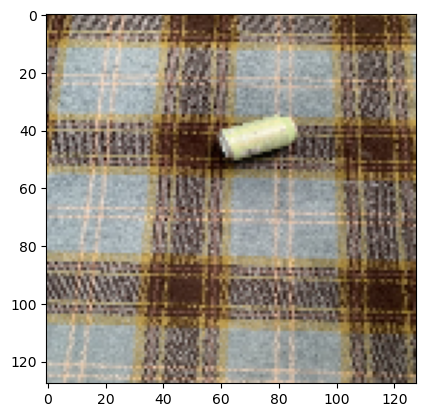

In [14]:
plt.imshow(imagenes[100])
plt.show()

In [15]:
train_images, test_images, train_labels, test_labels = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [16]:
from tensorflow.keras.layers import Input

In [17]:
num_clases = len(np.unique(etiquetas))

In [18]:
model = models.Sequential([
    layers.Input(shape=(128, 128, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_clases, activation='softmax')
])

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=23,validation_data=(test_images, test_labels))

Epoch 1/23


C:\Users\guill\anaconda3\envs\tf\lib\site-packages\keras\src\backend\tensorflow\nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


121/121 ━━━━━━━━━━━━━━━━━━━━ 31s 212ms/step - accuracy: 0.4248 - loss: 1.2573 - val_accuracy: 0.5104 - val_loss: 1.0773
Epoch 2/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 27s 221ms/step - accuracy: 0.5695 - loss: 1.0157 - val_accuracy: 0.6421 - val_loss: 0.9315
Epoch 3/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 28s 227ms/step - accuracy: 0.6527 - loss: 0.8526 - val_accuracy: 0.6691 - val_loss: 0.8032
Epoch 4/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 31s 259ms/step - accuracy: 0.7010 - loss: 0.7418 - val_accuracy: 0.7303 - val_loss: 0.7085
Epoch 5/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 35s 293ms/step - accuracy: 0.7547 - loss: 0.6312 - val_accuracy: 0.7656 - val_loss: 0.6474
Epoch 6/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 47s 389ms/step - accuracy: 0.8104 - loss: 0.5009 - val_accuracy: 0.7790 - val_loss: 0.6190
Epoch 7/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 32s 266ms/step - accuracy: 0.8488 - loss: 0.4127 - val_accuracy: 0.8133 - val_loss: 0.5658
Epoch 8/23
121/121 ━━━━━━━━━━━━━━━━━━━━ 30s 251ms/step - accuracy: 0.8781 - loss: 0.3357 - val

31/31 - 2s - 64ms/step - accuracy: 0.8413 - loss: 0.9298


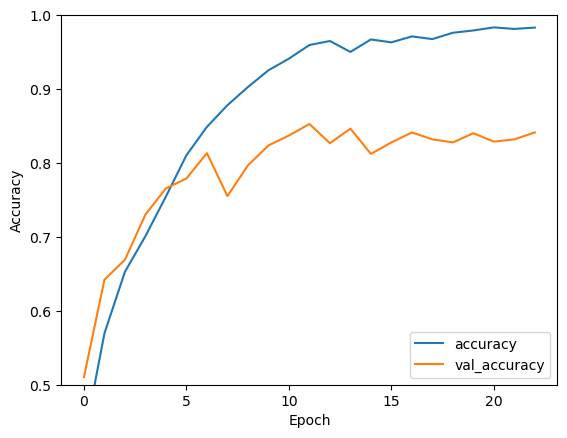

In [23]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [24]:
print(test_acc)

0.841286301612854


In [25]:
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [26]:
predictions = probability_model.predict(test_images)

31/31 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step


In [27]:
predictions[0]

array([0.17488259, 0.17488785, 0.1748933 , 0.47533625], dtype=float32)

In [28]:
def plot_image(i, predictions_array, true_label):
    true = true_label[i]
    num_classes = len(predictions_array)

    plt.grid(False)
    plt.xticks(range(num_classes))
    plt.yticks([])

    thisplot = plt.bar(range(num_classes), predictions_array, color="#777777")
    plt.ylim([0, 1])

    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true].set_color('blue')

TypeError: plot_image() takes 3 positional arguments but 4 were given

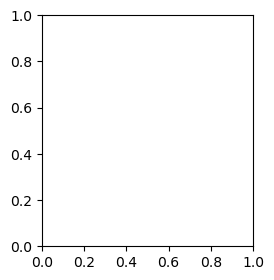

In [29]:
i = 5x
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

plt.show()

In [30]:
model.save("modelo_basura.keras")

In [31]:
model = tf.keras.models.load_model("modelo_basura.keras")

In [32]:
import os
os.listdir()

['.ipynb_checkpoints',
 'drinking-waste-classification.zip',
 'drinking_waste',
 'modelo_basura.h5',
 'modelo_basura.keras',
 'PIA_IASyRN.ipynb']

In [76]:
import cv2
import numpy as np
import tensorflow as tf
import winsound  # Para beep en Windows (comenta si estás en Linux/Mac)

# Cargar modelo
model = tf.keras.models.load_model("modelo_basura.keras")

# Nombres de tus clases
class_names = ["PET", "HDPEM", "AluCan", "Glass"]

# Iniciar cámara
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocesamiento
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128, 128))
    img_normalized = img_resized.astype("float32") / 255.0
    img_input = np.expand_dims(img_normalized, axis=0)

    # Predicción
    pred = model.predict(img_input, verbose=0)[0]
    clase = np.argmax(pred)
    conf = np.max(pred)

    # Determinar color según confianza
    if conf > 0.80:
        color = (0, 255, 0)  # Verde
    elif conf > 0.50:
        color = (0, 255, 255)  # Amarillo
    else:
        color = (0, 0, 255)  # Rojo

    # Si detecta PET → beep
    if class_names[clase] == "PET" and conf > 0.80:
        winsound.Beep(1000, 150)  # frecuencia 1000 Hz, duración 150 ms

    # Texto a mostrar
    texto = f"{class_names[clase]} ({conf*100:.1f}%)"

    # Mostrar en pantalla
    cv2.putText(frame, texto, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1, color, 2)

    cv2.imshow("Clasificador de Residuos - Tiempo Real", frame)

    # Salir con Q
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [105]:
import cv2
import numpy as np
import tensorflow as tf
import winsound
import time

# Cargar modelo
model = tf.keras.models.load_model("modelo_basura.keras")

# Nombres de tus clases
class_names = ["PET", "HDPEM", "AluCan", "Glass"]

# Iniciar cámara
cap = cv2.VideoCapture(0)

# ---------------------------
# Variables nuevas
# ---------------------------
modo_analisis = False
tiempo_inicio = 0
predicciones = []


while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocesamiento
    img = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (128, 128))
    img_normalized = img_resized.astype("float32") / 255.0
    img_input = np.expand_dims(img_normalized, axis=0)

    # Predicción
    pred = model.predict(img_input, verbose=0)[0]
    clase = np.argmax(pred)
    conf = np.max(pred)

    # Guardar predicciones solo si se activó el modo análisis
    if modo_analisis:
        predicciones.append(clase)

    # Determinar color según confianza
    if conf > 0.80:
        color = (0, 255, 0)
    elif conf > 0.50:
        color = (0, 255, 255)
    else:
        color = (0, 0, 255)

    # Beep para PET
    if class_names[clase] == "PET" and conf > 0.80:
        winsound.Beep(1000, 150)

    # Texto normal de detección
    texto = f"{class_names[clase]} ({conf*100:.1f}%)"
    cv2.putText(frame, texto, (10, 30),
                cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    # Mensaje si está en modo análisis
    if modo_analisis:
        cv2.putText(frame, "ANALIZANDO...", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 150, 255), 2)

        # Si pasaron 2 segundos → decisión final
        if time.time() - tiempo_inicio >= 2:
            modo_analisis = False

            # Tomar la clase más repetida
            decision = max(set(predicciones), key=predicciones.count)

            print("\n=======================")
            print(" DECISION FINAL →", class_names[decision])
            print("=======================\n")

            predicciones = []


    cv2.imshow("Clasificador de Residuos - Tiempo Real", frame)

    key = cv2.waitKey(1) & 0xFF

    # Activar análisis presionando ESPACIO
    if key == ord(' '):
        modo_analisis = True
        predicciones = []
        tiempo_inicio = time.time()
        print("\n--- ANALISIS INICIADO (2 segundos) ---\n")

    # Salir con Q
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()



--- ANALISIS INICIADO (2 segundos) ---


 DECISION FINAL → HDPEM


--- ANALISIS INICIADO (2 segundos) ---


 DECISION FINAL → HDPEM



KeyboardInterrupt: 

In [100]:
import serial
import time
import cv2
import numpy as np
import tensorflow as tf

# -------------------------
# Cargar modelo IA
# -------------------------
model = tf.keras.models.load_model("modelo_basura.keras")
class_names = ["PET", "HDPEM", "AluCan", "Glass"]

# -------------------------
# Conexión Serial
# -------------------------
arduino = serial.Serial("COM4", 115200, timeout=1)
time.sleep(2)

def enviar_a_arduino(clase):
    if clase == "PET":
        arduino.write(b'A')
    elif clase == "HDPEM":
        arduino.write(b'B')
    elif clase == "AluCan":
        arduino.write(b'C')
    elif clase == "Glass":
        arduino.write(b'D')

# -------------------------
# Cámara
# -------------------------
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocesamiento
    img = cv2.resize(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), (128, 128))
    img = np.expand_dims(img.astype("float32") / 255.0, axis=0)

    # Predicción
    pred = model.predict(img, verbose=0)[0]
    clase_detectada = class_names[np.argmax(pred)]
    conf = np.max(pred)

    # Mostrar texto
    cv2.putText(frame, f"{clase_detectada} ({conf*100:.1f}%)",
                (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    cv2.imshow("Clasificador", frame)

    # -------------------------
    # Si la IA está segura → mandar al ESP32
    # -------------------------
    if conf > 0.80:
        print("Enviando:", clase_detectada)
        enviar_a_arduino(clase_detectada)
        time.sleep(0.5)  # evita spam

    if cv2.waitKey(1) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
arduino.close()


Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando: HDPEM
Enviando

KeyboardInterrupt: 

In [79]:
import serial, time
ser = serial.Serial('COM4', 115200, timeout=1)
time.sleep(2)
ser.write(b'PET\n')
print('enviado')
ser.close()

enviado


In [124]:
import serial
import time
import cv2
import numpy as np
import tensorflow as tf
from collections import deque

# -------------------------
# Cargar modelo IA
# -------------------------
model = tf.keras.models.load_model("modelo_basura.keras")
class_names = ["PET", "HDPEM", "AluCan", "Glass"]

# -------------------------
# Conexión Serial ESP32
# -------------------------
arduino = serial.Serial("COM4", 115200, timeout=1)
time.sleep(2)

def enviar_a_arduino(clase):
    if clase == "PET":
        arduino.write(b'A')
    elif clase == "HDPEM":
        arduino.write(b'B')
    elif clase == "AluCan":
        arduino.write(b'C')
    elif clase == "Glass":
        arduino.write(b'D')

# -------------------------
# Configuración de votación
# -------------------------
VENTANA = 30
predicciones = deque(maxlen=VENTANA)

analizando = False  # Modo inactivo hasta que tú lo actives

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Mostrar texto de estado
    if not analizando:
        cv2.putText(frame, "Presiona ESPACIO para analizar",
                    (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,255), 2)
    else:
        cv2.putText(frame, "ANALIZANDO...",
                    (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

        # Procesamiento para IA
        img = cv2.resize(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB), (128, 128))
        img = np.expand_dims(img.astype("float32") / 255.0, axis=0)

        pred = model.predict(img, verbose=0)[0]
        pred_label = np.argmax(pred)

        predicciones.append(pred_label)

        # Si ya juntamos suficientes frames → DECISIÓN FINAL
        if len(predicciones) == VENTANA:
            decision = max(set(predicciones), key=predicciones.count)
            clase_final = class_names[decision]

            print("\n=== DECISION FINAL ===")
            print("Clase:", clase_final)
            print("======================\n")

            enviar_a_arduino(clase_final)
            print("✓ Enviado al ESP32:", clase_final)

            predicciones.clear()
            analizando = False  # Regresar a modo espera
            time.sleep(0.5)

    # Mostrar ventana
    cv2.imshow("Clasificador", frame)

    tecla = cv2.waitKey(1)

    if tecla == ord(' '):  # ESPACIO → iniciar análisis
        analizando = True
        predicciones.clear()
        print("\n>>> Analizando objeto...\n")

    if tecla == ord('q'):  # Q → salir
        break

cap.release()
cv2.destroyAllWindows()
arduino.close()



>>> Analizando objeto...


=== DECISION FINAL ===
Clase: HDPEM

✓ Enviado al ESP32: HDPEM

>>> Analizando objeto...


=== DECISION FINAL ===
Clase: HDPEM

✓ Enviado al ESP32: HDPEM
